In [5]:
import numpy as np
import matplotlib.pyplot as plt
import serial
from scipy import signal
from scipy.signal import butter, filtfilt
import pandas as pd

In [2]:
esp = serial.Serial("COM10", 115200)

In [24]:
l = []

seg = 8
muestras = seg*500   #esta muestreando a 500 muestras en un segundo

for i in range(muestras): 
    l2 = esp.readline().decode('utf-8')
    l2 = float(l2)
    l.append(l2)

len(l)

4000

In [25]:
l_reposo=[]
for i in range(1000):
    if i > 100:
        l_reposo.append(l[i])
l_min = min(l_reposo)
l_max = max(l_reposo)

print('Valor máximo en reposo: ',l_max)
print('Valor mínimo en reposo: ',l_min)

Valor máximo en reposo:  500.0
Valor mínimo en reposo:  85.0


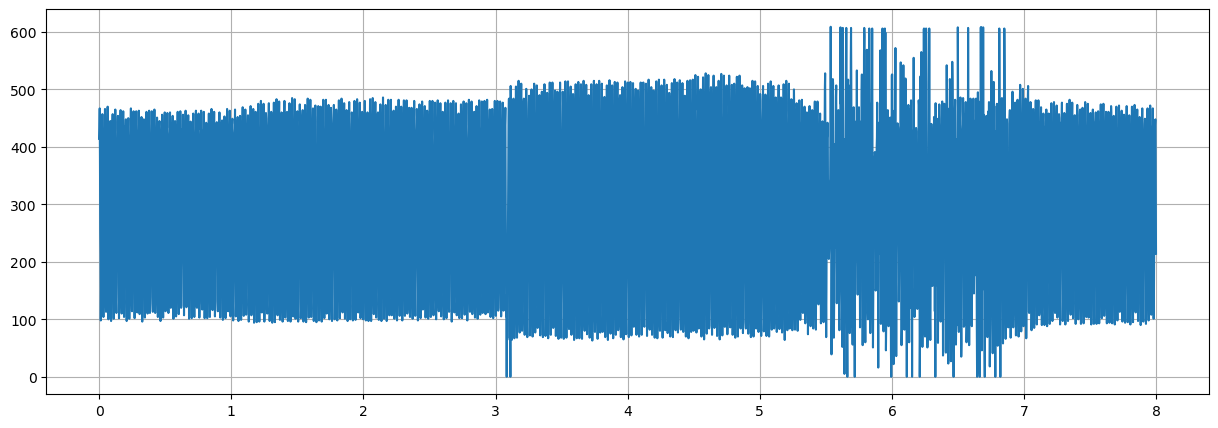

In [22]:
tiempo = np.arange(0, seg, 0.002)  #Desde cero hasta      segundos en un muestreo de    
#len(tiempo)

fm = 500 # 500[Hz] frecuencia de muestreo
T = 1/fm # Periodo del muestreo
largo_señal = len(l) # Largo de la señal 1
duracion_señal = T * largo_señal
tiempo_señal = np.arange(0, duracion_señal, T)

plt.figure(figsize = (15,5))
plt.plot(tiempo,l) # l
plt.grid()
plt.show()

In [ ]:
Data = {"Señal": l, 'Tiempo': tiempo}
Data1 = pd.DataFrame(Data)
Data1.to_csv("abre y cierrrede mano 22-11-2023")
Data1

,Señal,Tiempo
0,309.0,0.000
1,308.0,0.001
2,309.0,0.002
3,312.0,0.003
4,312.0,0.004
...,...,...
15995,302.0,15.995
15996,302.0,15.996
15997,303.0,15.997
15998,303.0,15.998


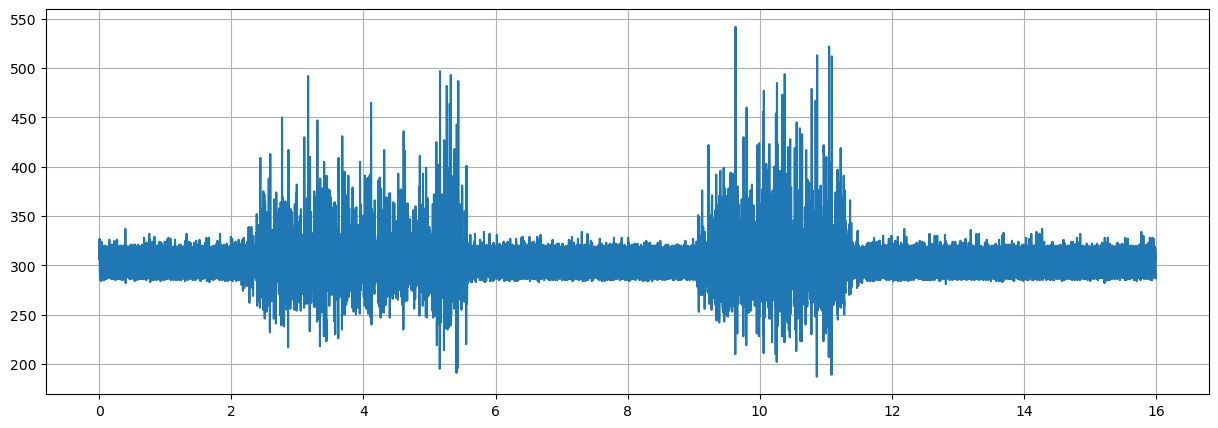

In [10]:
df = pd.read_csv('Puño máximo ferni 3')
plt.figure(figsize = (15,5))
plt.plot(df['Tiempo'],df['Señal'])#,'b')
plt.grid()
plt.show()

In [ ]:
freq1 = 1/np.mean(np.diff(tiempo_señal)) #permite obtener la frecuencia de muestreo.
b, a = butter(2, ([0.5, 5]/(freq1/2)), btype = 'bandpass') #funcion "butter" permite diseñar un filtro tipo butterworth
grafico_señal1 = filtfilt(b, a, l[0])
freq1 = int(freq1)
#signal_detrend1 = signal.detrend(grafico_señal1, -1, 'linear', 0, False)

freq2 = 1/np.mean(np.diff(tiempo_señal)) #permite obtener la frecuencia de muestreo.
x, y = butter(2, ([0.5, 5]/(freq2/2)), btype = 'bandpass') #funcion "butter" permite diseñar un filtro tipo butterworth
grafico_señal2 = filtfilt(x, y, l[1])
freq2 = int(freq2)
#signal_detrend2 = signal.detrend(grafico_señal2, -1, 'linear', 0, False)

plt.figure(figsize = (12, 4))

plt.subplot(2,1,1)
plt.plot(tiempo_señal, grafico_señal1)
plt.grid(True)

plt.subplot(2,1,2)
plt.plot(tiempo_señal, grafico_señal2)
plt.grid(True)

plt.tight_layout()

IndexError: tuple index out of range